In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f508a0393cd4badedb1566435bf99c0e2b9fde47efff9732237317e5e2d73c0d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


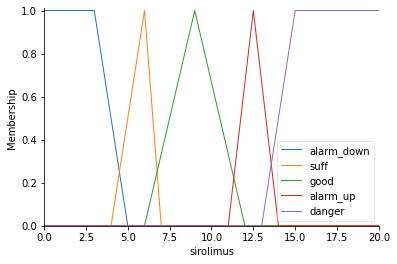

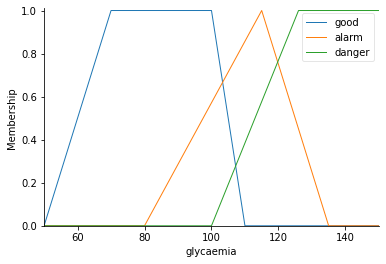

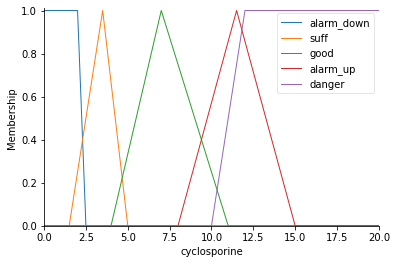

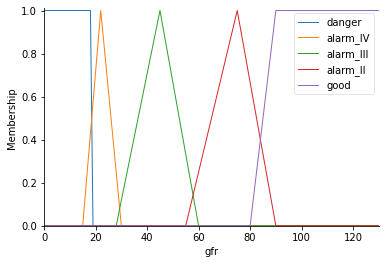

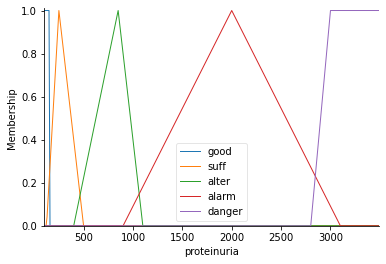

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
#input variable 
sirolimus = ctrl.Antecedent(np.arange(0,20.5,0.5),'sirolimus')
glycaemia = ctrl.Antecedent(np.arange(50,151,1),'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0,20.5,0.5),'cyclosporine')
#output need to predict
proteinuria = ctrl.Consequent(np.arange(100,3500,10),'proteinuria')
gfr = ctrl.Consequent(np.arange(0,131,1),'gfr')

sirolimus['alarm_down'] = fuzz.trapmf(sirolimus.universe,[0,0,3,5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe,[4,6,7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6,9,12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe,[11,12.5,14])
sirolimus['danger'] = fuzz.trapmf(sirolimus.universe,[13,15,20,20])
sirolimus.view()

glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,70,100,110])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[80,115,135])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[100,126,150,150])
glycaemia.view()

cyclosporine['alarm_down'] = fuzz.trapmf(cyclosporine.universe,[0,0,2,2.5])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe,[1.5,3.5,5])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[4,7,11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe,[8,11.5,15])
cyclosporine['danger'] = fuzz.trapmf(cyclosporine.universe,[10,12,20,20])
cyclosporine.view()

gfr['danger'] = fuzz.trapmf(gfr.universe,[0,0,18,19])
gfr['alarm_IV'] = fuzz.trimf(gfr.universe,[15,22,30])
gfr['alarm_III'] = fuzz.trimf(gfr.universe,[28,45,60])
gfr['alarm_II'] = fuzz.trimf(gfr.universe,[55,75,90])
gfr['good'] = fuzz.trapmf(gfr.universe,[80,90,130,130])
gfr.view()

proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[100,100,150,150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[125,250,500])
proteinuria['alter'] = fuzz.trimf(proteinuria.universe,[400,850,1100])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[900,2000,3100])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800,3000,3500,3500])
proteinuria.view()

In [ ]:
# rules for proteinuria

rule1 = ctrl.Rule(sirolimus['good'] & glycaemia['good'], proteinuria['good'])
rule2 = ctrl.Rule(sirolimus['good'] & glycaemia['alarm'], proteinuria['suff'])
rule3 = ctrl.Rule(sirolimus['good'] & glycaemia['danger'], proteinuria['alter'])

rule4 = ctrl.Rule(sirolimus['alarm_down'] & glycaemia['good'], proteinuria['suff'])
rule5 = ctrl.Rule(sirolimus['alarm_down'] & glycaemia['alarm'], proteinuria['suff'])
rule6 = ctrl.Rule(sirolimus['alarm_down'] & glycaemia['danger'], proteinuria['suff'])

rule7 = ctrl.Rule(sirolimus['suff'] & glycaemia['good'], proteinuria['suff'])
rule8 = ctrl.Rule(sirolimus['suff'] & glycaemia['alarm'], proteinuria['alter'])
rule9 = ctrl.Rule(sirolimus['suff'] & glycaemia['danger'], proteinuria['alarm'])

rule10 = ctrl.Rule(sirolimus['alarm_up'] & glycaemia['good'], proteinuria['alter'])
rule11 = ctrl.Rule(sirolimus['alarm_up'] & glycaemia['alarm'], proteinuria['alarm'])
rule12 = ctrl.Rule(sirolimus['alarm_up'] & glycaemia['danger'], proteinuria['alarm'])

rule13 = ctrl.Rule(sirolimus['danger'] & glycaemia['good'], proteinuria['alarm'])
rule14 = ctrl.Rule(sirolimus['danger'] & glycaemia['alarm'], proteinuria['danger'])
rule15 = ctrl.Rule(sirolimus['danger'] & glycaemia['danger'], proteinuria['danger'])


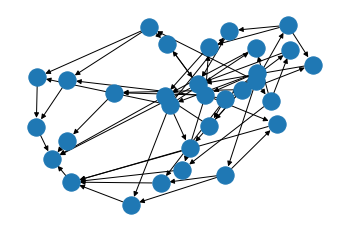

In [ ]:
proteinuria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
proteinuria_ctrl.view()


1779.7521325046155


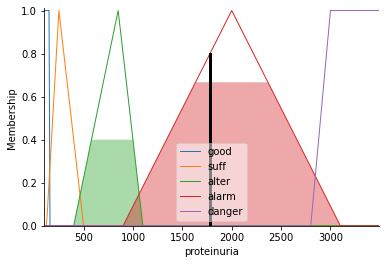

In [ ]:
proteinuria_fis = ctrl.ControlSystemSimulation(proteinuria_ctrl)
proteinuria_fis.input['sirolimus'] = 12
proteinuria_fis.input['glycaemia'] = 106
proteinuria_fis.compute()
print(proteinuria_fis.output['proteinuria'])
proteinuria.view(sim = proteinuria_fis)

In [ ]:
rule16 = ctrl.Rule(cyclosporine['good'] & glycaemia['good'], gfr['good'])
rule17 = ctrl.Rule(cyclosporine['good'] & glycaemia['alarm'], gfr['alarm_II'])
rule18 = ctrl.Rule(cyclosporine['good'] & glycaemia['danger'], gfr['alarm_III'])

rule19 = ctrl.Rule(cyclosporine['alarm_down'] & glycaemia['good'], gfr['good'])
rule20 = ctrl.Rule(cyclosporine['alarm_down'] & glycaemia['alarm'], gfr['alarm_II'])
rule21 = ctrl.Rule(cyclosporine['alarm_down'] & glycaemia['danger'], gfr['alarm_III'])

rule22 = ctrl.Rule(cyclosporine['suff'] & glycaemia['good'], gfr['alarm_II'])
rule23 = ctrl.Rule(cyclosporine['suff'] & glycaemia['alarm'], gfr['alarm_III'])
rule24 = ctrl.Rule(cyclosporine['suff'] & glycaemia['danger'], gfr['alarm_IV'])

rule25 = ctrl.Rule(cyclosporine['alarm_up'] & glycaemia['good'], gfr['alarm_II'])
rule26 = ctrl.Rule(cyclosporine['alarm_up'] & glycaemia['alarm'], gfr['alarm_IV'])
rule27 = ctrl.Rule(cyclosporine['alarm_up'] & glycaemia['danger'], gfr['danger'])

rule28 = ctrl.Rule(cyclosporine['danger'] & glycaemia['good'], gfr['alarm_III'])
rule29 = ctrl.Rule(cyclosporine['danger'] & glycaemia['alarm'], gfr['danger'])
rule30 = ctrl.Rule(cyclosporine['danger'] & glycaemia['danger'], gfr['danger'])

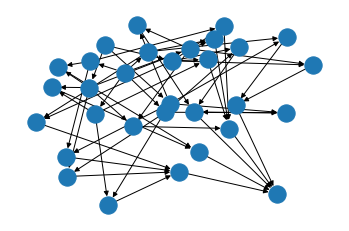

In [ ]:
gfr_ctrl = ctrl.ControlSystem([rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30])
gfr_ctrl.view()

35.37632360195619


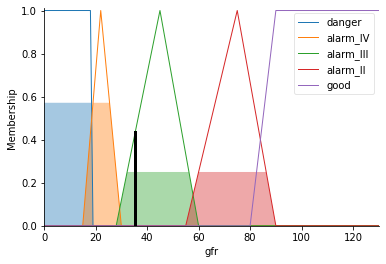

In [ ]:
gfr_fis = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr_fis.input['glycaemia'] = 120
gfr_fis.input['cyclosporine'] = 10
gfr_fis.compute()
print(gfr_fis.output['gfr'])
gfr.view(sim = gfr_fis)